**Anna Smith**

**GitHub username: acs-233**

**Imperial College London - MSc EDSML - IRP**
# **CNN to predict $\textnormal{BECO}_2\textnormal{N}$ data - Reduced featres and data**

In [1]:
from sklearn.model_selection import train_test_split

from bayareaco2.models.data import load_Xy
from bayareaco2.models.data import fit_scaler, scale_features
from bayareaco2.models.data import feature_selection

from bayareaco2.models.cnn1d import reshape_1D_X
from bayareaco2.models.cnn1d import CNN_1D

## Reading in Data

In [2]:
# Load data
X, y = load_Xy()

Dropping 18 features with all zero data
Number of observations: 17389
Number of features: 105


In [3]:
# Standardizing the data
scaler = fit_scaler(X)
X_scaled = scale_features(scaler, X)

In [4]:
# Splitting data: 80% training, 20% testing
full_X_train, X_test, full_y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
# Splitting the training data: 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(full_X_train, full_y_train, test_size=0.2, random_state=42)

## Feature Selection

In [6]:
# Feature selection
selected_features = feature_selection(X_train, y_train)

32 features selected with Spearman's correlation coefficient ≥ 0.03
11 features selected with VIF < 3: 

11 features selected: 

temp
pressure
rh
Trees_area_50m
total_road_length_1000m
total_road_length_200m
Built_Area_area_2000m
total_AADT_3000m
Flooded_Vegetation_area_1000m
Industrial_area_5000m
avg_ndvi_50m


In [7]:
# Filtering data by selected featres and reshaping
original_full_X_train = full_X_train.copy()
X_train = reshape_1D_X(X_train[selected_features])
X_val = reshape_1D_X(X_val[selected_features])
full_X_train = reshape_1D_X(full_X_train[selected_features])
X_test = reshape_1D_X(X_test[selected_features])

In [8]:
# Checking the shape of the data
X_train.shape

(11128, 11, 1)

In [9]:
# Flattening the data
y_train = y_train.values
y_val = y_val.values
full_y_train = full_y_train.values
y_test = y_test.values

In [14]:
# Checking the shape of the input data
input_shape = (X_train.shape[1], 1)
input_shape

(11, 1)

## Training CNN Model

In [15]:
# Instantiating the model
model = CNN_1D(input_shape)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 9, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 9, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,881 (167.50 KB)

 Trainable params: 42,241 (165.00 KB)

 Non-trainable params: 640 (2.50 KB)

In [16]:
# Compiling the model
model.compile()

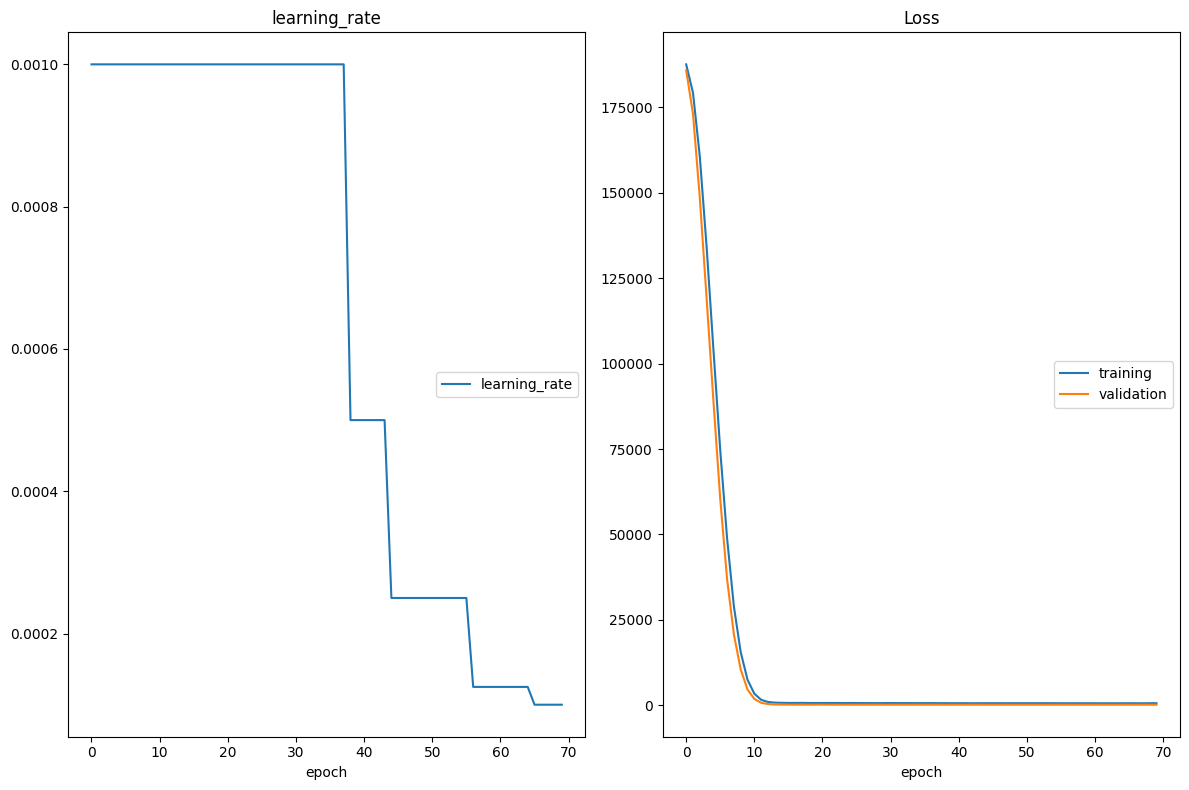

learning_rate
	learning_rate    	 (min:    0.000, max:    0.001, cur:    0.000)
Loss
	training         	 (min:  575.356, max: 187614.734, cur:  595.513)
	validation       	 (min:  163.572, max: 185915.906, cur:  164.573)
140/140 - 0s - 3ms/step - loss: 595.5131 - val_loss: 164.5732 - learning_rate: 1.0000e-04


In [17]:
# Training the model
history = model.fit(X_train, y_train, 'train_CNN_1D.keras')

R²: 0.57
Mean Squared Error (MSE): 156.15
Root Mean Squared Error (RMSE): 12.50
Mean Absolute Error (MAE): 9.14


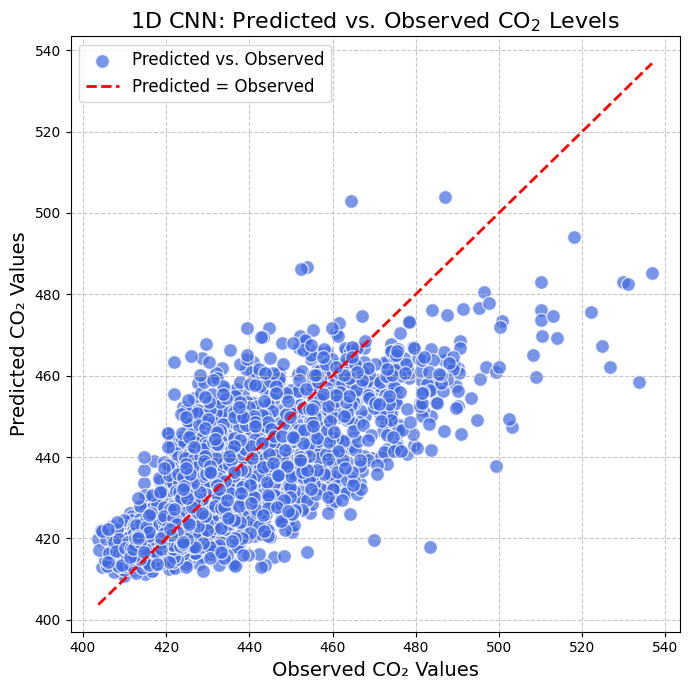

In [18]:
# Evaluating the model
train_CNN_1D_results = model.evaluate(X_val, y_val)

## Final CNN

In [19]:
# Defining full train set input shape
input_shape = (full_X_train.shape[1], 1)

In [20]:
# Instantiating the final model
final_model = CNN_1D(input_shape)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 9, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 9, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 2, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,881 (167.50 KB)

 Trainable params: 42,241 (165.00 KB)

 Non-trainable params: 640 (2.50 KB)

In [21]:
# Compiling the final model
final_model.compile()

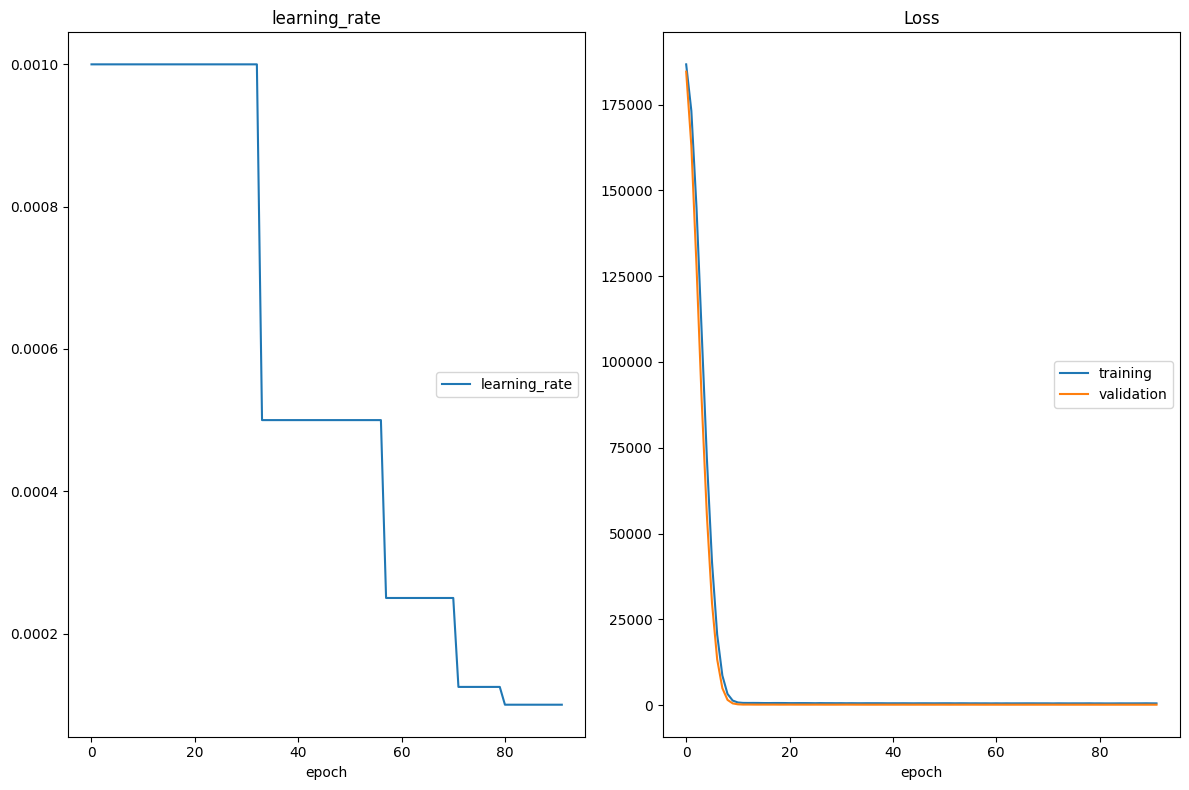

learning_rate
	learning_rate    	 (min:    0.000, max:    0.001, cur:    0.000)
Loss
	training         	 (min:  537.987, max: 186704.766, cur:  549.033)
	validation       	 (min:  162.022, max: 184579.797, cur:  163.236)
174/174 - 0s - 3ms/step - loss: 549.0331 - val_loss: 163.2364 - learning_rate: 1.0000e-04


In [22]:
# Training the final model using the full training set
final_history = final_model.fit(full_X_train, full_y_train, 'final_CNN_1D.keras')

R²: 0.58
Mean Squared Error (MSE): 159.45
Root Mean Squared Error (RMSE): 12.63
Mean Absolute Error (MAE): 9.08


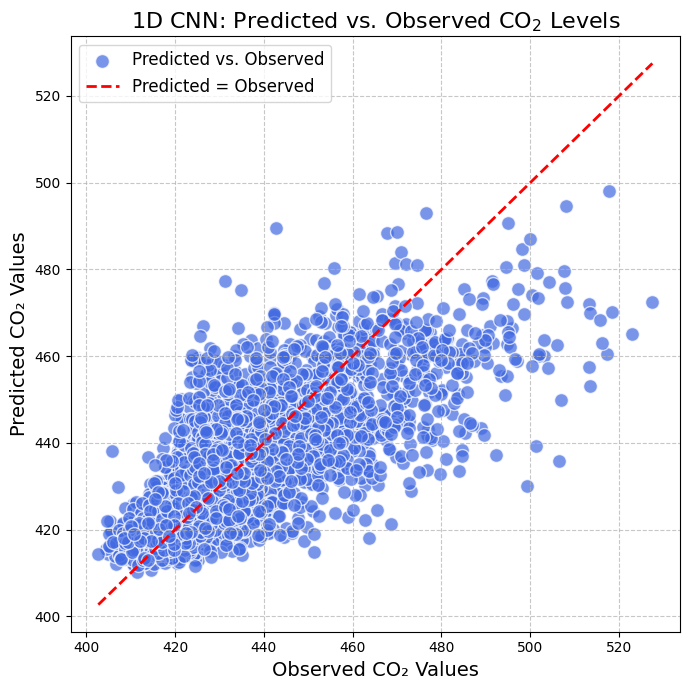

In [23]:
# Evaluating the final model
final_CNN_1D_results = final_model.evaluate(X_test, y_test)

## Evaluating Central Test Nodes

Overall Performance Metrics:
R²: 0.42
Mean Squared Error (MSE): 304.71
Root Mean Squared Error (RMSE): 17.46
Mean Absolute Error (MAE): 13.01 



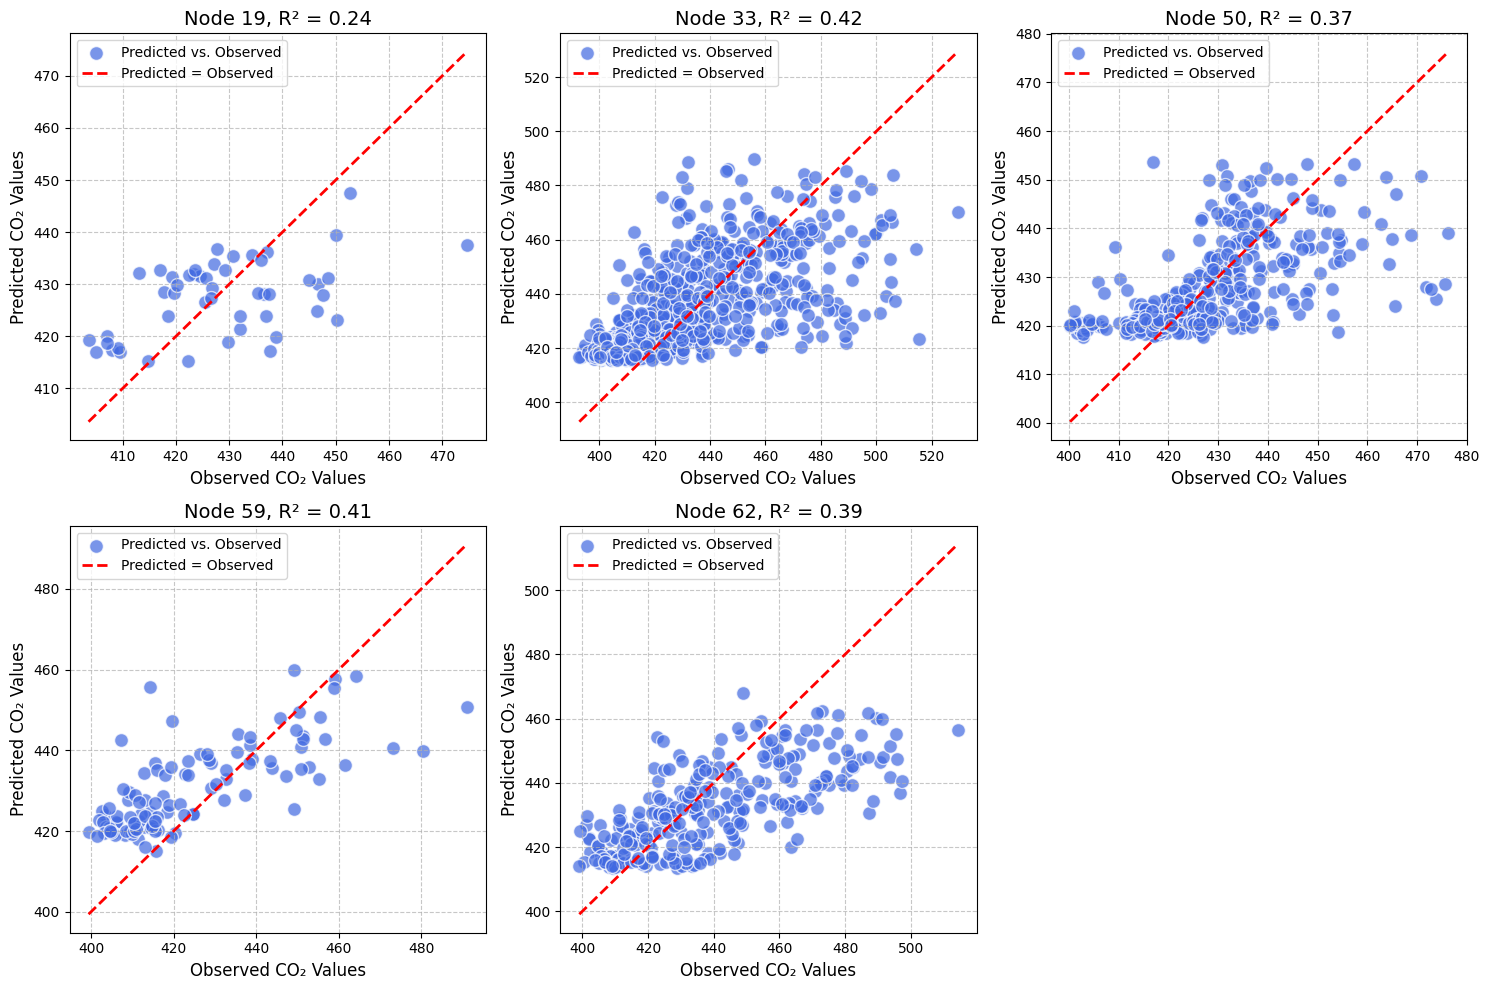

In [24]:
# Evaluating model performance usign central test nodes
central_node_metrics, central_overall_metrics = final_model.evaluate_test_nodes(selected_features, scaler, X.columns, nodes='central')

## Evaluating Fringe Test Nodes

Overall Performance Metrics:
R²: -0.47
Mean Squared Error (MSE): 352.46
Root Mean Squared Error (RMSE): 18.77
Mean Absolute Error (MAE): 16.10 



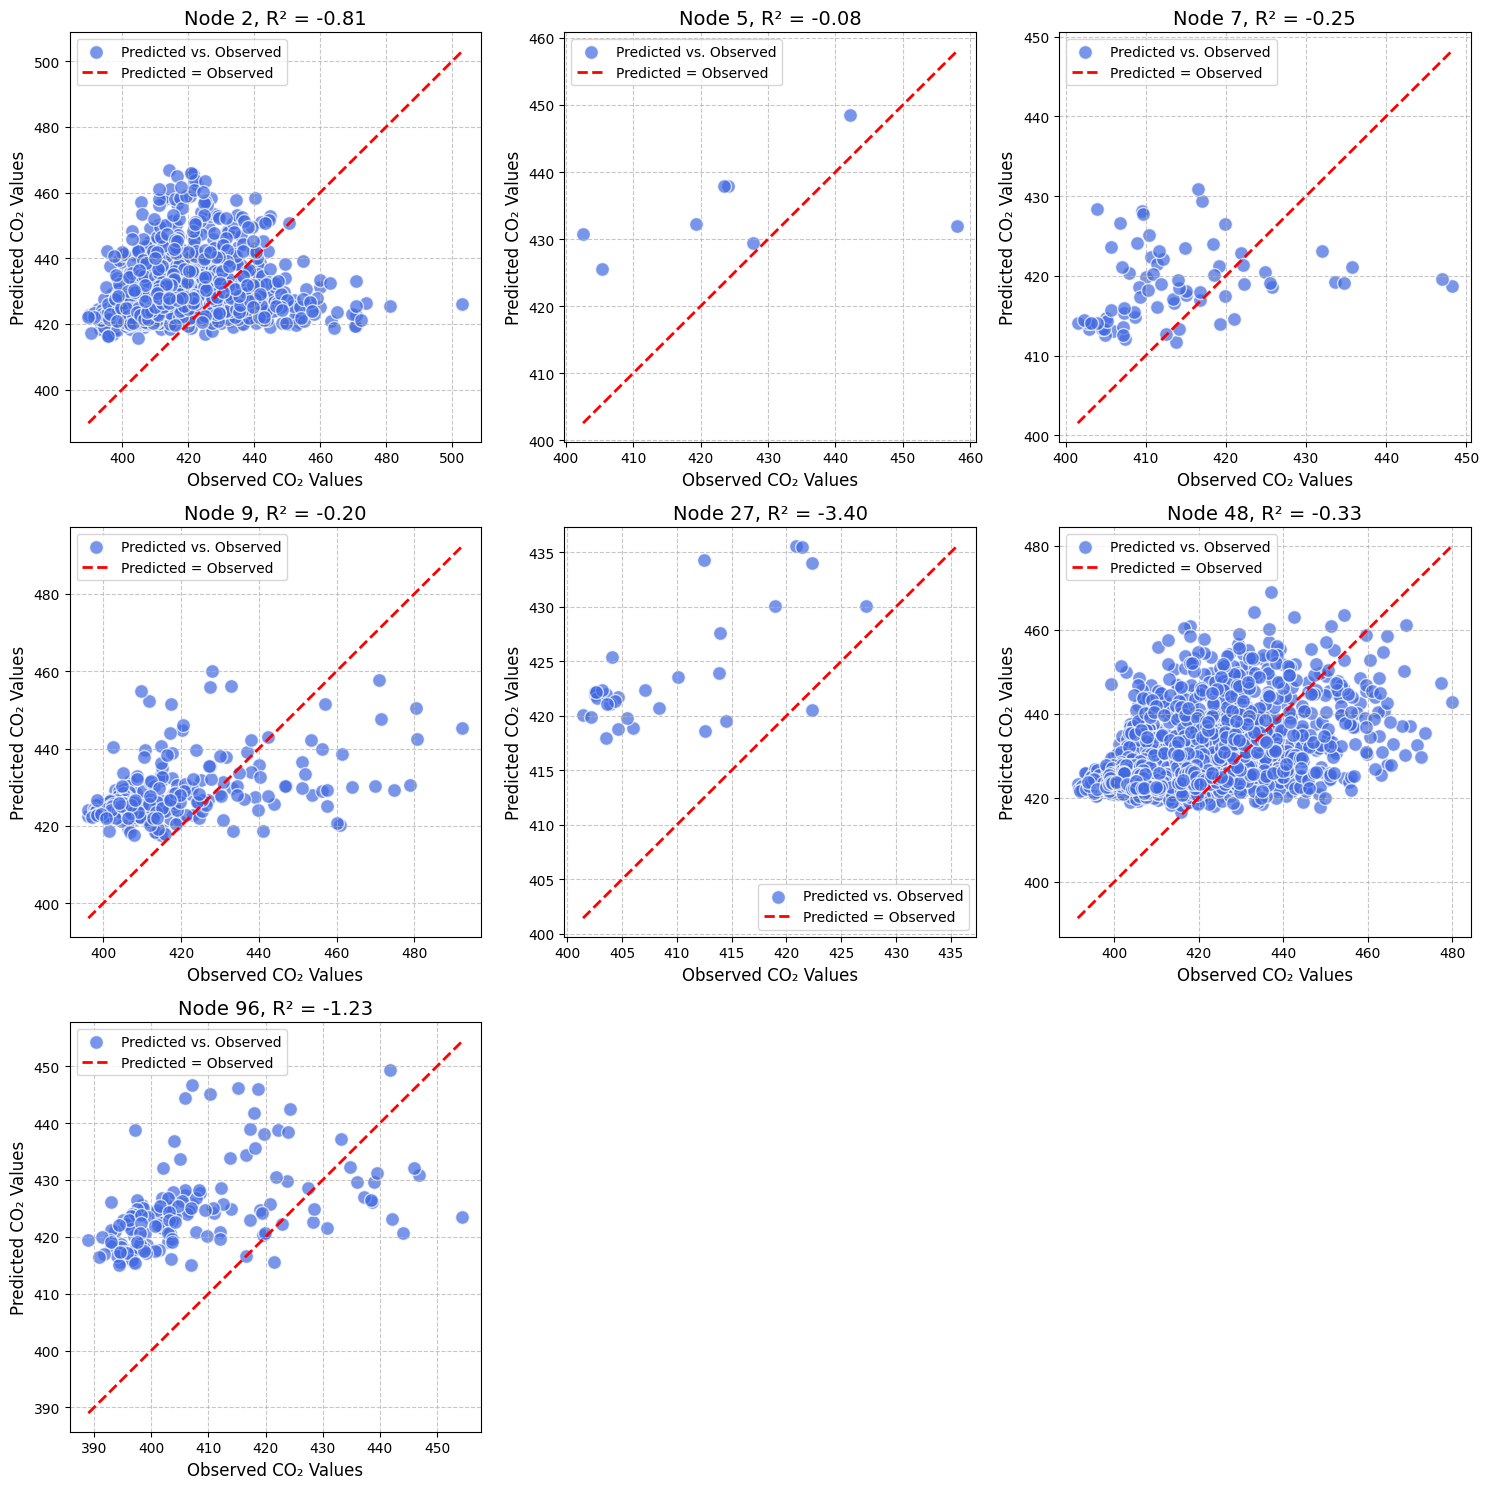

In [25]:
# Evaluating model performance on fringe test nodes
central_node_metrics, central_overall_metrics = final_model.evaluate_test_nodes(selected_features, scaler, X.columns, nodes='fringe')

## Node Map

In [31]:
# Plotting node map and evaluating model performance on nodes
node_eval_df, node_map = final_model.make_node_map(original_full_X_train, selected_features, scaler, X.columns)

In [32]:
# Plotting the node map
node_map

In [33]:
# Viewing the node evaluation dataframe
node_eval_df

,node_id,n,R²,MSE,RMSE,MAE
0,2,1185,-0.81,400.54,20.01,17.03
1,3,299,-0.41,383.72,19.59,14.88
2,4,110,-0.02,349.48,18.69,13.78
3,5,8,-0.08,311.58,17.65,15.46
4,7,73,-0.25,116.99,10.82,8.99
...,...,...,...,...,...,...
60,96,151,-1.23,439.27,20.96,19.32
61,125,43,0.42,135.54,11.64,9.38
62,280,114,0.54,111.10,10.54,6.51
63,281,181,0.64,111.74,10.57,7.69
